Implementing Industry Applications
--

Recipe 6.1. Consumer complaint classification
--
In this section, we are going to implement end-to-end solutions for 
"Consumer complaint classification" using NLP.

Implementing Multiclass Classification
--
Let’s understand how to do multiclass classification for text data in Python
through solving Consumer complaint classifications for the finance
industry.

Problem
--
Each week the Consumer Financial Protection Bureau sends thousands of consumers’ complaints about financial products and services to companies for a response. Classify those consumer complaints into the product category it belongs to using the description of the complaint.

Solution
--
The goal of the project is to classify the complaint into a specific product
category. Since it has multiple categories, it becomes a multiclass
classification that can be solved through many of the machine learning
algorithms.

Once the algorithm is in place, whenever there is a new complaint,
we can easily categorize it and can then be redirected to the concerned
person. This will save a lot of time because we are minimizing the human
intervention to decide whom this complaint should go to.

In [1]:
# Importing all the libraries:
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing,linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [ ]:
# Importing the data
# Import the data that was downloaded in the last step:
Data = pd.read_csv("C:\\Users\\DELL\\suven\\suven-Adv-ML\\datasets\\Consumer_Complaints.csv",encoding='latin-1')
Data.info()
Data.tail()

![dtypes_consumer_complaints](images/dtypes_consumer_complaints.png 'dtypes_consumer_complaints')

In [5]:
# Selecting required columns and rows
Data = Data[['product', 'consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

# See top 5 rows
Data.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [12]:
# Factorizing the product-category column
#similar to label encoding

Data['category_id'] =  Data['product'].factorize()[0]
Data.head()


,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [15]:
# Check the distriution of complaints by category

Data.groupby('product').product.count()

#or
#Data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: product, dtype: int64

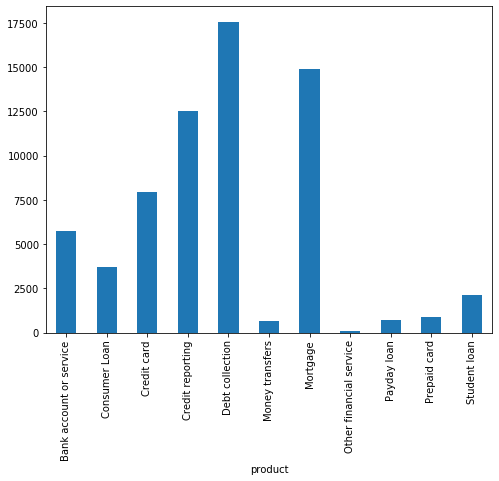

In [17]:
# Lets plot it and see
fig = plt.figure(figsize=(8,6))
Data.groupby('product').product.count().plot.bar(ylim=0)
plt.show()

In [22]:
# Splitting the data
# Split the data into train and validation:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['consumer_complaint_narrative'], Data['product'])

In [23]:
# Feature engineering using TF-IDF
# Create TF-IDF vectors as we discussed in Chapter (or Part) 4. 

# Here we consider maximum features to be 5000.

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.transform(valid_y)

print(train_y[:5]) #for checking purposse
print(valid_y[:5]) #for checking purposse

tfidf_vect = TfidfVectorizer(analyzer ='word',token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect.fit(Data['consumer_complaint_narrative'])

xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

print(xtrain_tfidf[:50])

[2 4 6 4 2]
[4 3 3 3 4]
  (0, 4967)	0.25778945715830903
  (0, 4966)	0.18743573873462738
  (0, 4922)	0.027381770830999255
  (0, 4921)	0.06259610518454296
  (0, 4911)	0.0882463321792417
  (0, 4895)	0.020867796907613288
  (0, 4890)	0.026669758552853768
  (0, 4884)	0.02365365894972902
  (0, 4881)	0.07527032843175842
  (0, 4874)	0.05421765740300849
  (0, 4859)	0.028419023770448065
  (0, 4836)	0.04806715323946675
  (0, 4774)	0.027952494165724276
  (0, 4678)	0.0666713730499161
  (0, 4676)	0.050278925061139075
  (0, 4618)	0.08112497333164413
  (0, 4528)	0.10285935314284263
  (0, 4517)	0.07719486865636917
  (0, 4503)	0.10008211463277915
  (0, 4489)	0.035920314903877676
  (0, 4486)	0.03611159753516589
  (0, 4474)	0.10080158885741138
  (0, 4466)	0.032997208050875124
  (0, 4464)	0.05839785108643056
  (0, 4462)	0.1438561763765801
  :	:
  (49, 849)	0.03292182004488993
  (49, 747)	0.04832902661602779
  (49, 738)	0.0348376106186734
  (49, 686)	0.0926994655159109
  (49, 682)	0.02910521529362449
  (49, 

In [26]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)
# Model summary

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr',
n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)
print ("Accuracy: ", accuracy)

Accuracy:  0.84427014728775


In [27]:
# Classification report
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf),
                                    target_names=Data['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.83      0.79      0.81      1455
          Consumer Loan       0.79      0.55      0.65       902
               Mortgage       0.80      0.81      0.81      1961
            Credit card       0.85      0.85      0.85      3132
       Credit reporting       0.82      0.90      0.86      4386
           Student loan       0.73      0.50      0.59       157
Bank account or service       0.91      0.96      0.93      3766
            Payday loan       0.00      0.00      0.00        35
        Money transfers       0.81      0.24      0.37       186
Other financial service       0.83      0.57      0.68       215
           Prepaid card       0.88      0.77      0.82       507

               accuracy                           0.84     16702
              macro avg       0.75      0.63      0.67     16702
           weighted avg       0.84      0.84      0.84     16702



c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


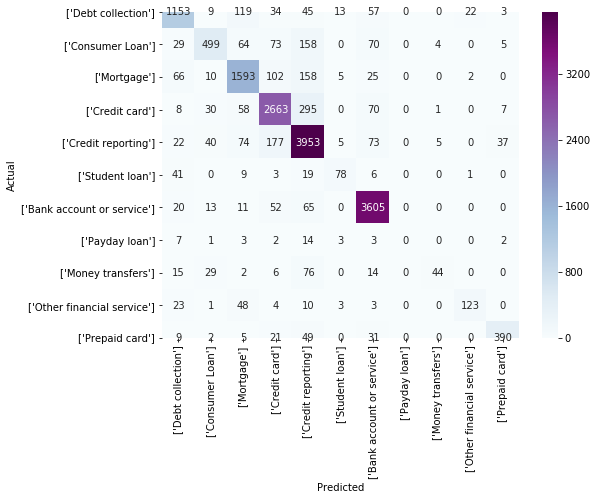

In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

# Vizualizing confusion matrix
category_id_df = Data[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)

id_to_category = dict(category_id_df[['category_id','product']].values)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu", 
            xticklabels=category_id_df[['product']].values, 
            yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
print(category_to_id)

{'Debt collection': 0, 'Consumer Loan': 1, 'Mortgage': 2, 'Credit card': 3, 'Credit reporting': 4, 'Student loan': 5, 'Bank account or service': 6, 'Payday loan': 7, 'Money transfers': 8, 'Other financial service': 9, 'Prepaid card': 10}


In [30]:
print(id_to_category)

{0: 'Debt collection', 1: 'Consumer Loan', 2: 'Mortgage', 3: 'Credit card', 4: 'Credit reporting', 5: 'Student loan', 6: 'Bank account or service', 7: 'Payday loan', 8: 'Money transfers', 9: 'Other financial service', 10: 'Prepaid card'}


Recommended reading 
https://www.absentdata.com/python-graphs/create-a-heat-map-with-seaborn/

In [32]:
# Prediction example
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]

# type your code here





['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
 - Predicted as: 'Credit reporting'
